In [4]:
%load_ext autoreload

In [5]:
%autoreload

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [9]:
DATAPATH=Path('./data')
assert DATAPATH.exists()

In [22]:
df_rb = pd.read_csv(DATAPATH/'Game_Logs_Runningback.csv',
                    na_values='--',
                    parse_dates={'gameDate' : ['Game Date', 'Year']},
                    keep_date_col=True
                    )
print(df_rb.dtypes)
print(df_rb.shape)
df_rb.head()

gameDate               datetime64[ns]
Player Id                      object
Name                           object
Position                       object
Year                           object
Season                         object
Week                            int64
Game Date                      object
Home or Away                   object
Opponent                       object
Outcome                        object
Score                          object
Games Played                    int64
Games Started                   int64
Rushing Attempts              float64
Rushing Yards                 float64
Yards Per Carry               float64
Longest Rushing Run            object
Rushing TDs                   float64
Receptions                    float64
Receiving Yards               float64
Yards Per Reception           float64
Longest Reception              object
Receiving TDs                 float64
Fumbles                       float64
Fumbles Lost                  float64
dtype: objec

,gameDate,Player Id,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,...,Yards Per Carry,Longest Rushing Run,Rushing TDs,Receptions,Receiving Yards,Yards Per Reception,Longest Reception,Receiving TDs,Fumbles,Fumbles Lost
0,2018-08-10,ameerabdullah/2552374,"Abdullah, Ameer",RB,2018,Preseason,1,08/10,Away,OAK,...,4.0,8,1.0,1.0,7.0,7.0,7,0.0,NaN,NaN
1,2018-08-17,ameerabdullah/2552374,"Abdullah, Ameer",RB,2018,Preseason,2,08/17,Home,NYG,...,3.5,4,0.0,1.0,-2.0,-2.0,-2,0.0,NaN,NaN
2,2017-08-13,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Preseason,1,08/13,Away,IND,...,2.0,2,0.0,1.0,14.0,14.0,14,0.0,NaN,NaN
3,2017-08-19,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Preseason,2,08/19,Home,NYJ,...,4.0,8,0.0,1.0,5.0,5.0,5,0.0,NaN,NaN
4,2017-08-25,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Preseason,3,08/25,Home,NE,...,4.6,12,0.0,3.0,39.0,13.0,18,0.0,NaN,NaN


In [19]:
df_rb.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10478.0,2015.074155,2.232103,2005.0,2014.0,2016.0,2017.0,2018.0
Week,10478.0,7.652892,5.650782,0.0,3.0,6.0,13.0,22.0
Games Played,10478.0,0.844627,0.362277,0.0,1.0,1.0,1.0,1.0
Games Started,10478.0,0.291468,0.454460,0.0,0.0,0.0,1.0,1.0
Rushing Attempts,6319.0,8.691407,6.782053,1.0,3.0,7.0,13.0,38.0
Rushing Yards,6319.0,36.433455,35.528377,-11.0,10.0,25.0,53.0,251.0
Yards Per Carry,6319.0,4.062288,3.138457,-8.0,2.5,3.7,5.0,65.0
Rushing TDs,6319.0,0.249881,0.528162,0.0,0.0,0.0,0.0,4.0
Receptions,5452.0,2.180117,1.851243,0.0,1.0,2.0,3.0,15.0
Receiving Yards,5452.0,17.987894,20.240506,-12.0,4.0,12.0,25.0,159.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f74a7b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fbe8780>]], dtype=object)

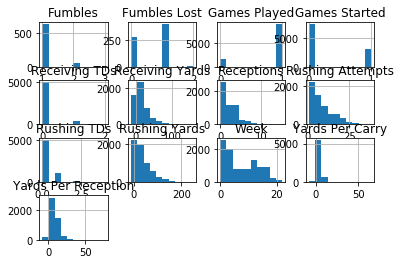

In [23]:
df_rb.hist()

In [26]:
df = pd.read_csv(DATAPATH/'Career_Stats_Rushing.csv',
                 na_values='--',
                 thousands=',',
                )
print(df.dtypes)
df.head()

Player Id                             object
Name                                  object
Position                              object
Year                                   int64
Team                                  object
Games Played                           int64
Rushing Attempts                     float64
Rushing Attempts Per Game            float64
Rushing Yards                        float64
Yards Per Carry                      float64
Rushing Yards Per Game               float64
Rushing TDs                          float64
Longest Rushing Run                   object
Rushing First Downs                  float64
Percentage of Rushing First Downs    float64
Rushing More Than 20 Yards           float64
Rushing More Than 40 Yards           float64
Fumbles                              float64
dtype: object


,Player Id,Name,Position,Year,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,Rushing TDs,Longest Rushing Run,Rushing First Downs,Percentage of Rushing First Downs,Rushing More Than 20 Yards,Rushing More Than 40 Yards,Fumbles
0,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Detroit Lions,14,165.0,11.8,552.0,3.3,39.4,4.0,34,24.0,14.5,5.0,0.0,2.0
1,ameerabdullah/2552374,"Abdullah, Ameer",RB,2016,Detroit Lions,2,18.0,9.0,101.0,5.6,50.5,0.0,24,6.0,33.3,1.0,0.0,0.0
2,ameerabdullah/2552374,"Abdullah, Ameer",RB,2015,Detroit Lions,16,143.0,8.9,597.0,4.2,37.3,2.0,36,27.0,18.9,4.0,0.0,4.0
3,nelsonagholor/2552600,"Agholor, Nelson",WR,2017,Philadelphia Eagles,16,1.0,0.1,7.0,7.0,0.4,0.0,7,1.0,100.0,0.0,0.0,0.0
4,nelsonagholor/2552600,"Agholor, Nelson",WR,2016,Philadelphia Eagles,15,5.0,0.3,14.0,2.8,0.9,0.0,5,0.0,0.0,0.0,0.0,0.0


In [27]:
df['Rushing Yards']

0        552.0
1        101.0
2        597.0
3          7.0
4         14.0
5          NaN
6          9.0
7        408.0
8        465.0
9       1272.0
10       187.0
11         NaN
12         NaN
13         1.0
14         NaN
15         NaN
16         5.0
17       591.0
18        34.0
19       514.0
20         9.0
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         0.0
28         NaN
29         NaN
         ...  
2018     213.0
2019      12.0
2020       6.0
2021       0.0
2022       NaN
2023      16.0
2024      -6.0
2025      30.0
2026       NaN
2027       NaN
2028      29.0
2029      71.0
2030       NaN
2031      11.0
2032       NaN
2033      15.0
2034      17.0
2035      54.0
2036       NaN
2037       4.0
2038       NaN
2039      -2.0
2040       2.0
2041       5.0
2042     253.0
2043     465.0
2044     740.0
2045      26.0
2046     334.0
2047      60.0
Name: Rushing Yards, Length: 2048, dtype: float64